In [ ]:
# Random Forests for regression
# in depth: https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm
# other sources
# https://deepai.org/machine-learning-glossary-and-terms/random-forest
# https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/
# https://www.datacareer.de/blog/random-forest-in-python-with-scikit-learn/
# example applications: https://www.sciencedirect.com/topics/engineering/random-forest

# and check out this nice application
# https://whitecollar.thenewinquiry.com/static/whitepaper.pdf

# March 2022. updated Feb 2024

In [20]:
import numpy
import pandas

In [ ]:
# connect to your G drive
#link your google drive to your notebook
from google.colab import drive
drive.mount('/content/drive')
#change this based on your setup
root = '/content/drive/MyDrive/Colab/ML/'
sys.path.append(root + 'code/')
datapath =  root + 'data/'

print('This is the datapath: ', datapath)

Mounted at /content/drive
This is the datapath:  /content/drive/MyDrive/Colab/ML/data/


In [21]:
# Upload the dataset
diamonds = pandas.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [22]:
diamonds.shape

(53940, 10)

In [23]:
# Encode the labels (to numerical values)
from sklearn.preprocessing import LabelEncoder

categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()
le.fit(categorical_features)
print(le.classes_)

['clarity' 'color' 'cut']


In [24]:
# Convert the variables to numerical
for i in range(len(categorical_features)):
    new = le.fit_transform(diamonds[categorical_features[i]])
    diamonds[categorical_features[i]] = new

# Check the dataset again
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [25]:
# Define input features and a target (the price)

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

In [43]:
# Import libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

# Here we are using random forest for regression.
# While regression helps predict a continuous quantity, classification predicts discrete class labels.
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


# Train the model
method = 'poisson'
reg = RandomForestRegressor(criterion=method, n_estimators = 10, max_depth = 10, random_state = 101)

# convert y_training data to single 1-D array
# https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
y_train_1d = y_train.values.ravel()

# perform the fit
reg.fit(X_train, y_train_1d)

RandomForestRegressor(criterion='poisson', max_depth=10, n_estimators=10,
                      random_state=101)

In [38]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = reg.predict(X_test)

result = X_test
result['price'] = y_test
result['predictions'] = predictions.tolist()
result.head()

,carat,depth,table,x,y,z,clarity,cut,color,price,predictions
46519,0.51,62.7,54.0,5.10,5.08,3.19,4,2,3,1781,1668.756376
8639,1.06,61.9,59.0,6.52,6.50,4.03,2,3,5,4452,4335.257446
23029,0.33,61.3,56.0,4.51,4.46,2.75,2,2,3,631,569.163445
51641,0.31,63.1,58.0,4.30,4.35,2.73,5,1,3,544,668.449842
25789,2.04,58.8,60.0,8.42,8.32,4.92,2,3,5,14775,15665.837023


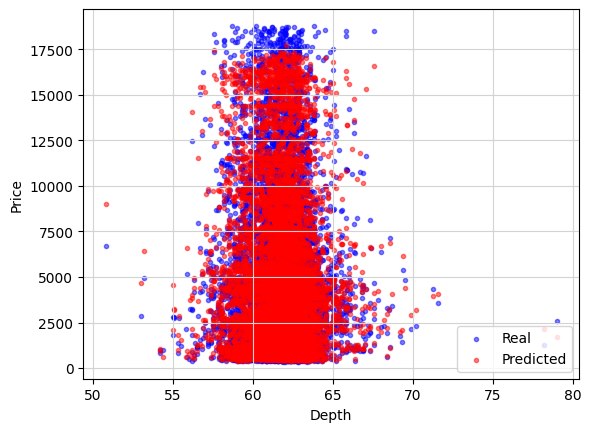

In [39]:
# Check the quality of the predictions - graphically
import matplotlib.pyplot as plt

# Define x axis

#x_axis = X_test.carat
x_axis = X_test.depth


# Build scatterplot
choice = 'Depth'
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')

plt.xlabel(choice)
plt.ylabel('Price')

plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
imagename = 'diamondstest.jpg'
#plt.savefig(datapath + imagename)
plt.show()

In [40]:
# Check the quality of the predictions - analytically

# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)


In [ ]:
# How to round?
val = 9.78787
val = round(val, 2)
print(val)

In [35]:
# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 317.3
Mean Squared Error: 347201.69
R-squared scores: 0.98


In [31]:
# Which are the important features ?

# Get features list
characteristics = X.columns

# Get the variables importances, sort them, and print the result
importances = list(reg.feature_importances_)
characteristics_importances = [(characteristic, round(importance, 2)) for characteristic, importance in zip(characteristics, importances)]
characteristics_importances = sorted(characteristics_importances, key = lambda x: x[1], reverse = False)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in characteristics_importances];

Variable: depth                Importance: 0.0
Variable: table                Importance: 0.0
Variable: x                    Importance: 0.0
Variable: z                    Importance: 0.0
Variable: cut                  Importance: 0.0
Variable: color                Importance: 0.02
Variable: clarity              Importance: 0.04
Variable: y                    Importance: 0.45
Variable: carat                Importance: 0.48


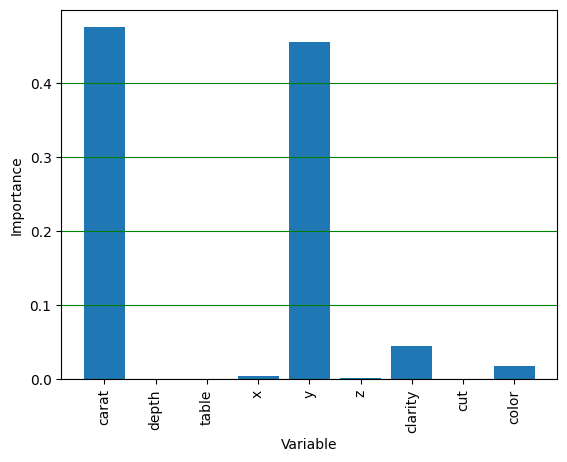

In [32]:
# Visualize the variables importances
plt.bar(characteristics, importances, orientation = 'vertical')
plt.xticks(rotation = 'vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.grid(axis = 'y', color = 'green', linestyle = 'solid')
plt.show()

In [33]:
val = 9.78787
val = round(val, 2)
print(val)

9.79
